In [1]:
%matplotlib inline
import pandas
import seaborn

In [2]:
import matplotlib.pyplot as plt

# Loading the CSV File

In [3]:
data = pandas.read_csv("C:/Users/Pritam PC/OneDrive/Desktop/uber-raw-data-apr14.txt")


In [4]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [5]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [6]:
data.tail


<bound method NDFrame.tail of                  Date/Time      Lat      Lon    Base
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512
...                    ...      ...      ...     ...
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764

[564516 rows x 4 columns]>

In [7]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [8]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [9]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Analysis
# Date of Month

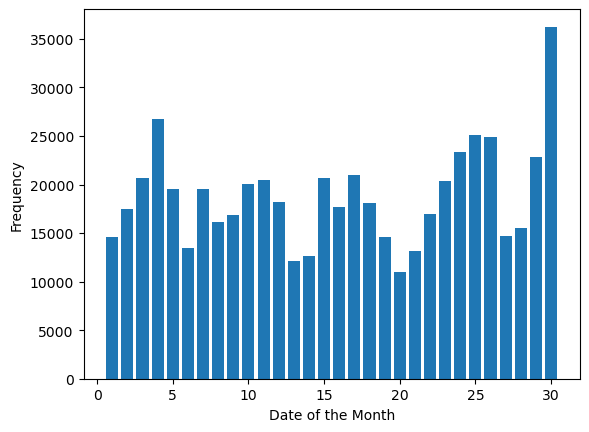

In [10]:
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame and 'dom' is a column in that DataFrame
plt.hist(data['dom'], bins=30, rwidth=0.8, range=(0.5, 30.5))
plt.xlabel('Date of the Month')
plt.ylabel('Frequency')
plt.show()



In [11]:
#for k, rows in data.groupby('dom'):
#    print((k, len(rows)))
 
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

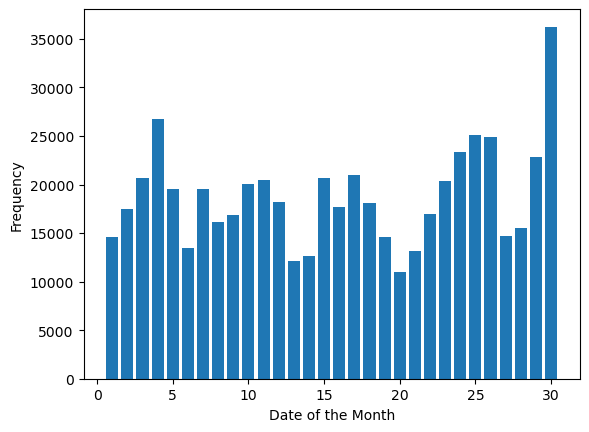

In [12]:
# Assuming 'by_date' is a list or an array containing data for each day of the month
plt.bar(range(1, 31), by_date)
plt.xlabel('Date of the Month')
plt.ylabel('Frequency')
plt.show()

In [13]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

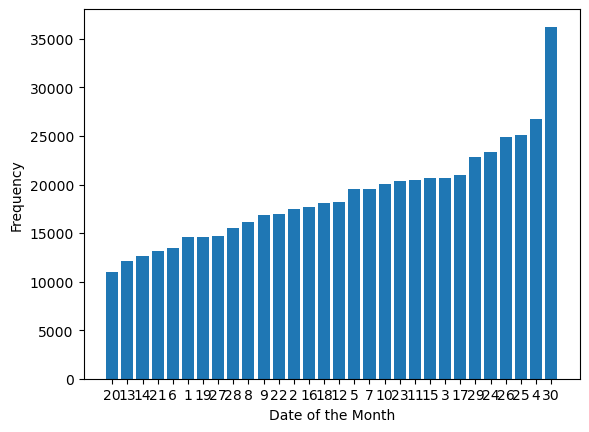

In [14]:
plt.bar(range(1, 31), by_date_sorted)
plt.xticks(range(1, 31), by_date_sorted.index)
plt.xlabel('Date of the Month')
plt.ylabel('Frequency')
plt.show()

# Hour Analysis

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <BarContainer object of 24 artists>)

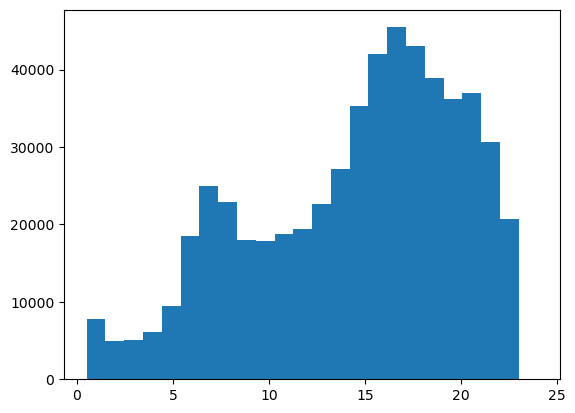

In [15]:
plt.hist(data.hour, bins=24, range=(.5, 24))

# Working Day Analysis


([<matplotlib.axis.XTick at 0x289237cc880>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

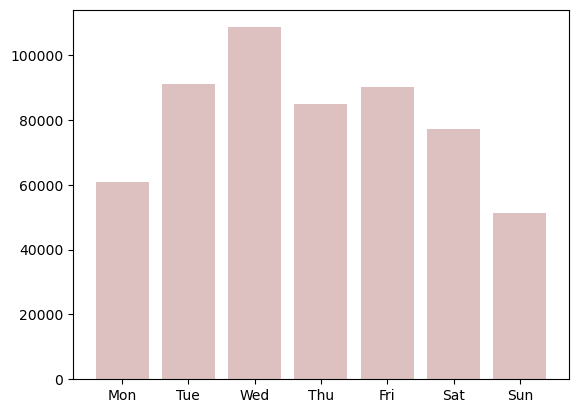

In [16]:
plt.hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

# Cross analysis 

In [17]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

<Axes: xlabel='hour', ylabel='weekday'>

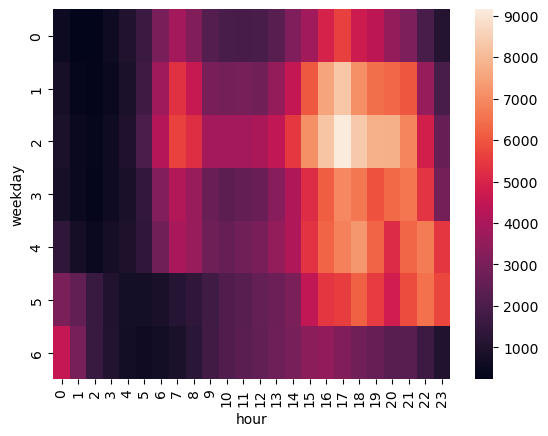

In [18]:
seaborn.heatmap(by_cross)

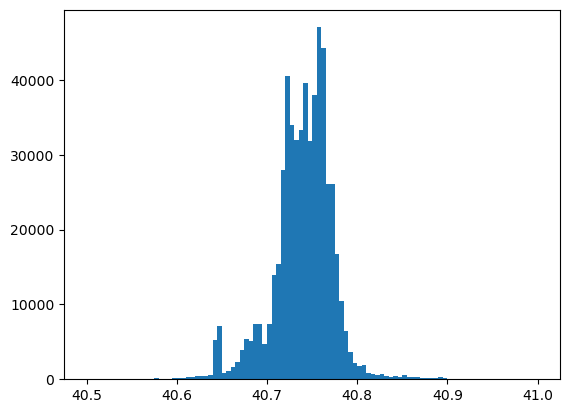

In [19]:
plt.hist(data['Lat'], bins=100, range = (40.5, 41));


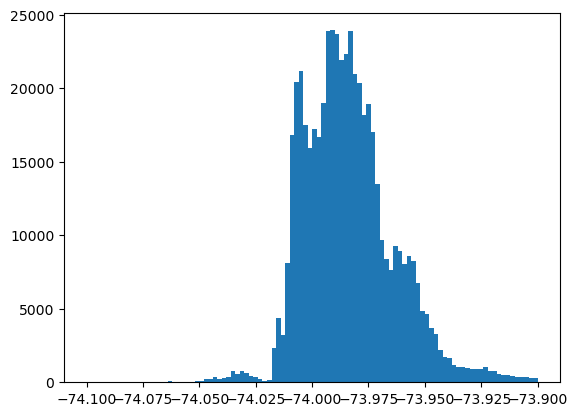

In [20]:
plt.hist(data['Lon'], bins=100, range = (-74.1, -73.9));

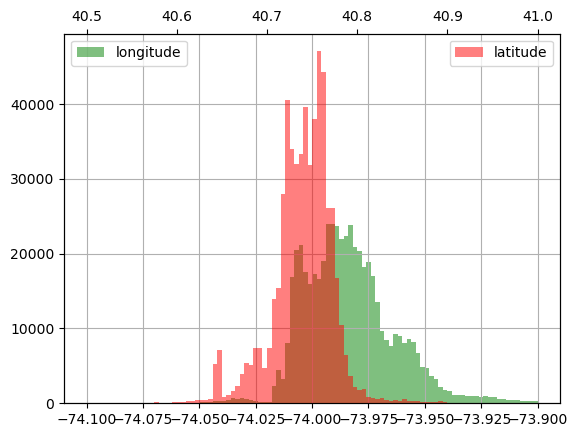

In [21]:
plt.hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
plt.grid()
plt.legend(loc='upper left')
plt.twiny()
plt.hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
plt.legend(loc='best');


(40.7, 41.0)

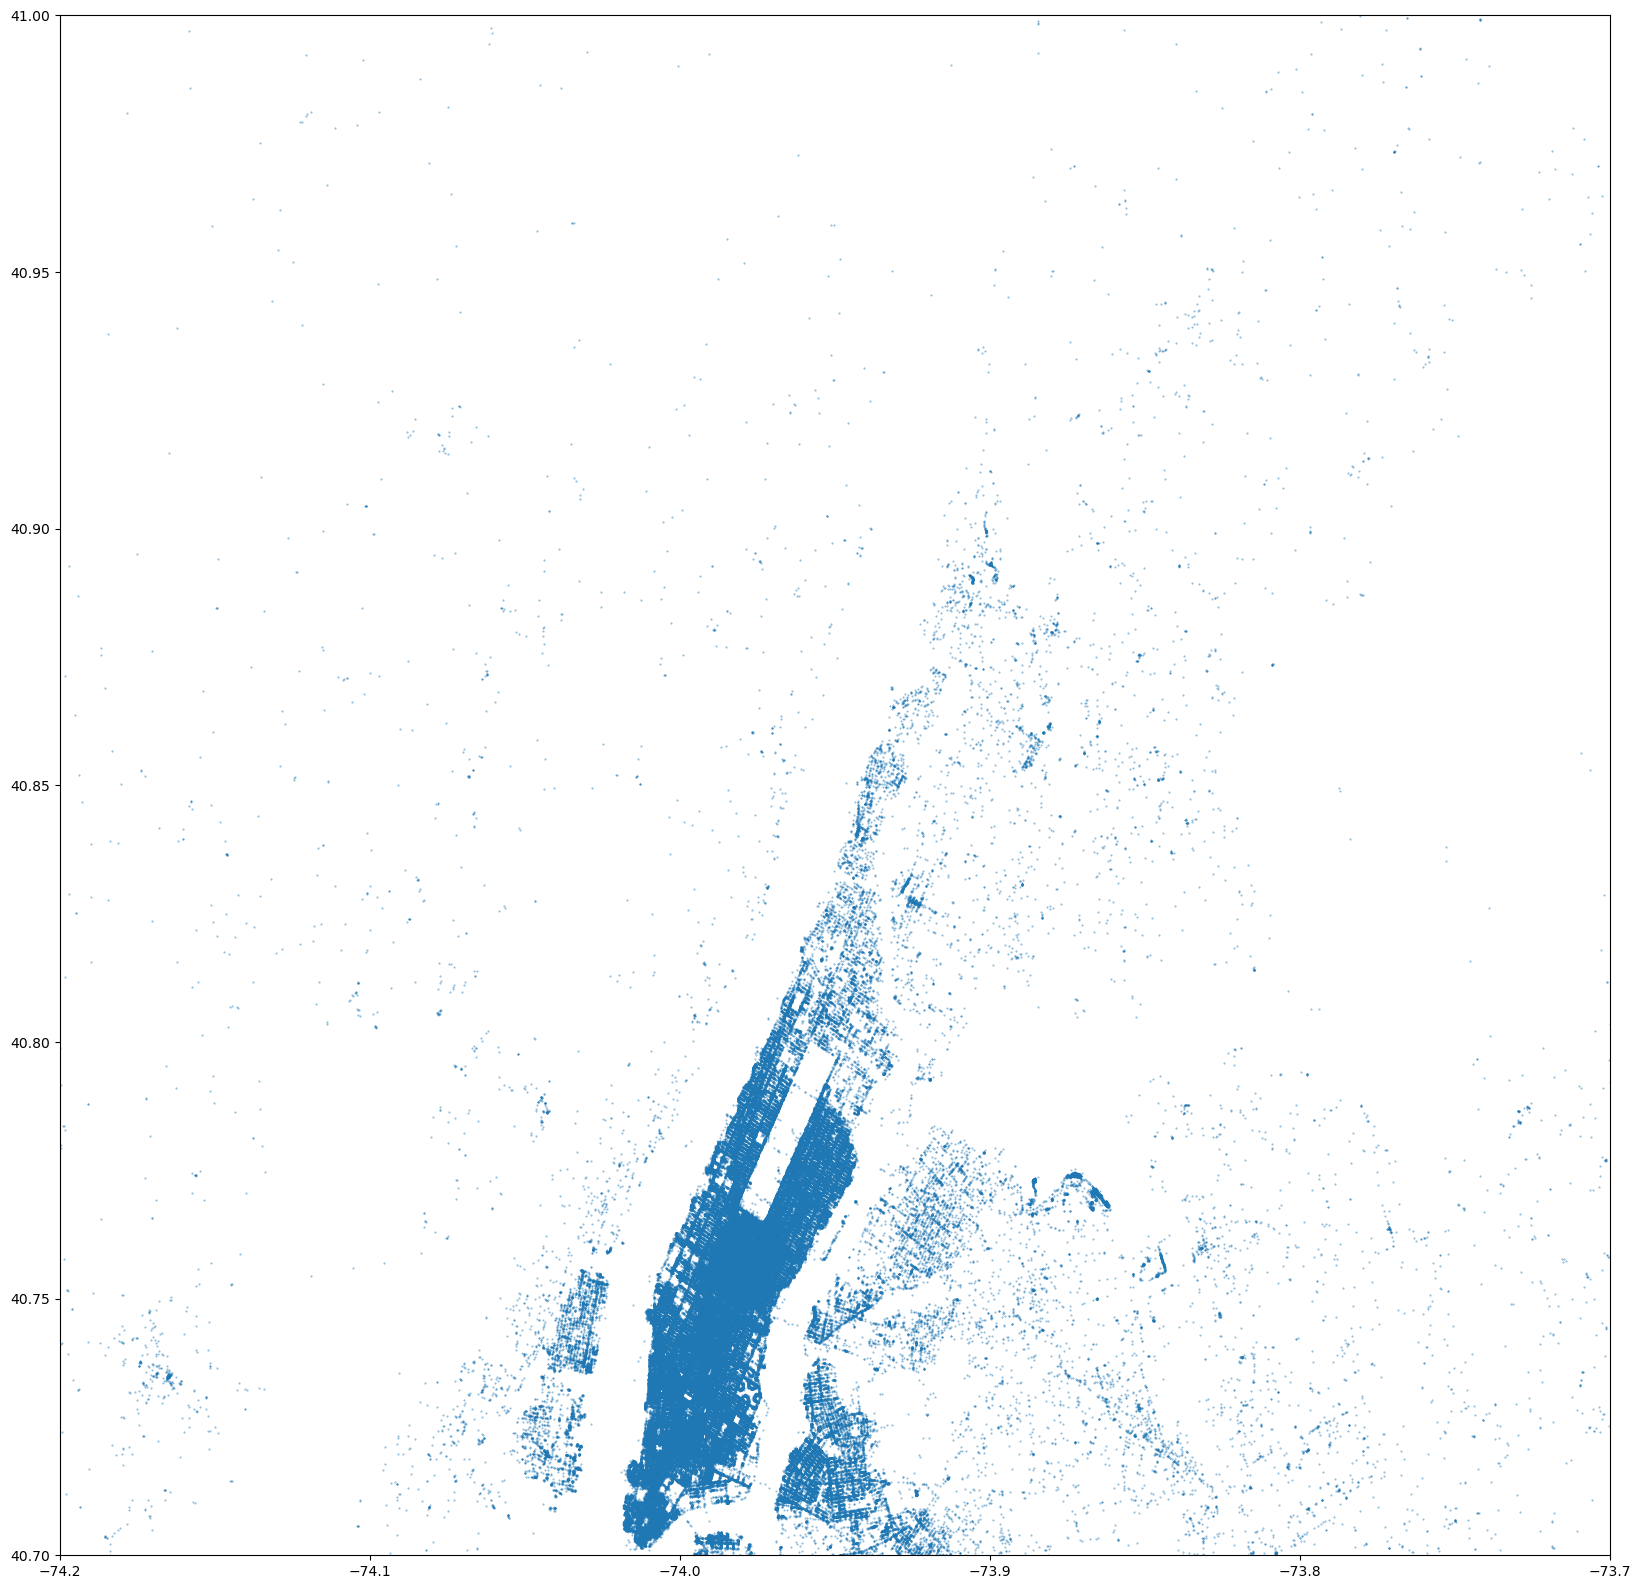

In [22]:
plt.figure(figsize=(20, 20))
plt.plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)